## Dry Bean Analysis
**Author: Nathan Zhou**

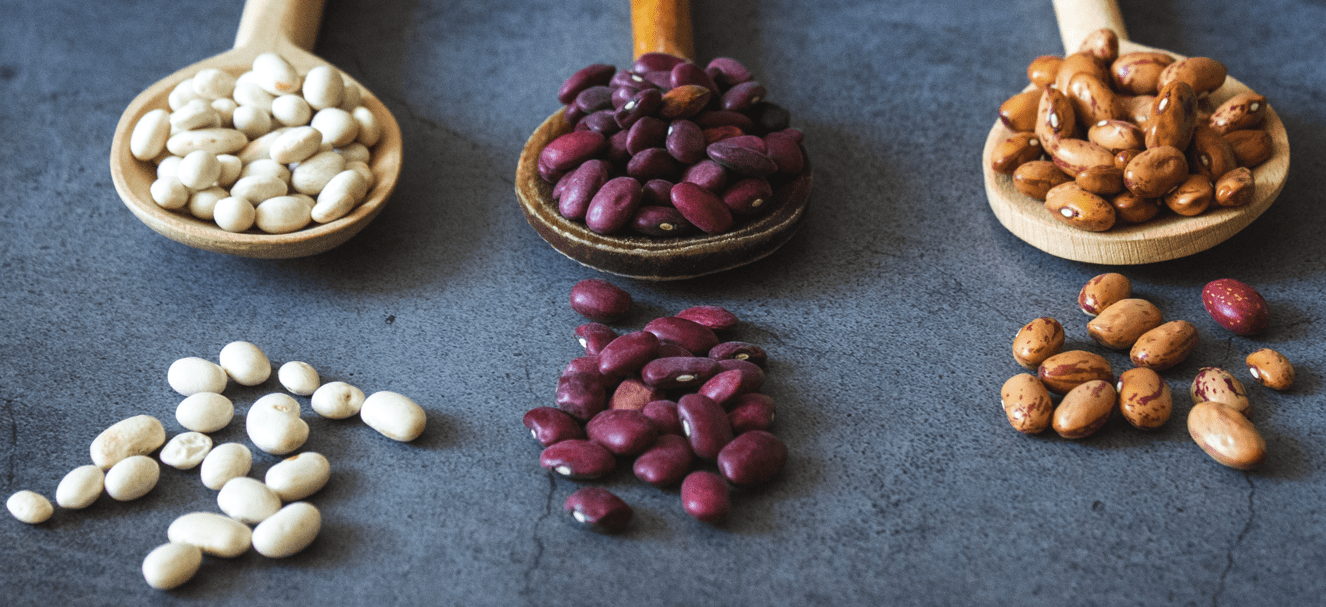

Who doesn't love beans? I sure do!  
The goal for this small project is to tinker about with different classification models using the Dry Bean Dataset, specifically to compare the classification performance between a Support Vector Machine Classifier vs Stochastic Gradient Descent Classifer, whilst also trying to achive a high accuracy rate for classification using both models.

Dataset Abstract: Images of 13,611 grains of 7 different registered dry beans were taken with a high-resolution camera. A total of 16 features; 12 dimensions and 4 shape forms, were obtained from the grains.

In [ ]:
#Import required Libaries and functions
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, classification_report
from sklearn.linear_model import SGDClassifier
from sklearn import svm
import seaborn as sns
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
# reading in Data and setting Constants
SOURCE = "/kaggle/input/dry-bean-dataset/Dry_Bean.csv"
CLASSES = np.array(["SEKER","BARBUNYA","BOMBAY","CALI","DERMASON","HOROZ","SIRA"])
data = pd.read_csv(SOURCE)

## Part 1: Data Exploration Aims
- Display first 5 lines of Data
- Display scatterplot and their correlation between 6 variables taken from the dataset
- Display number of instances for each Bean class

In [ ]:
#Display first 5 lines of the Dataset
data.head()

In [ ]:
#Visualisation for 6 variable Scatterplot including Class labels
data6 = data[["Area","Perimeter","AspectRation","Eccentricity","roundness","Compactness","Class"]]
data6.head()
sns.set_theme(style="whitegrid")
sns.pairplot(data6, hue="Class")

In [ ]:
#Using the correlation matrix to aid my descriptions in accordance with the scatterplot matrix
data6.corr()

#### Describing the Scatterplot Matrix
Looking at these scatterplots, we can assert that there are clear clusters forming within some scatterplots, namely between the area and perimeter attributes with all other attributes (but not with themselves). We can assume that these clusters are filled with beans with similar attributes and may be more likely to be classified within a particular class. 
It is also clear that there is a clear relationship between area and perimeter, suggesting they are proportionate with a high correlation coefficient, being 0.967. 

Assessing variables "Compactness" with "Aspect Ration" and "Eccentricity", each relationship shows a clear inversely proportionate relationship. The "Compactness" attribute has a -0.988 correlation coefficient with "Aspect Ration", showing a slight concave out curve. Similarly, the "Compactness" attribute has a -0.970 correlation coefficient with "Eccentricity", showing a slight concave in curve in the scatter matrix. 

It is also worth noting that for the relationship between the "Roundness" attribute and the "Aspect Ration, "Ecccentricity" and "Compactness" is unique in the sense that there seems to be an upperbound between these scatter plots. They have a defined upperbound where there are no outliers which go beyond the upper bound (at least in this study). This suggests that for a bean of a given "Aspect Ration", "Eccentricity" or "Compactness" value, there will be a maximum roundess.  Outliers for low values of roundess do exist. There seems to be some moderate correlation between roundness and these attributes:
- Aspect Ration: -0.767
- Eccentricity: -0.722
- Compactness: 0.768

In [ ]:
# Finding instances of each class
def findInstances(beans,classes):
    instanceCount = dict()
    for beanClass in CLASSES:
        numinstances = beans.Class.value_counts()[beanClass]
        instanceCount[beanClass] = numinstances
        print(f"There are {numinstances} instances for class: {beanClass}")

    minInstance = min(instanceCount, key=instanceCount.get)

    print(f"\nThe class of beans with the least amount of instances is: {minInstance}")
    
    
findInstances(data,CLASSES)

## Part 2: Preprocessing Data for Training 
- Applying Train-Test-Split to form 80%-20% split of data
- Applying StandardScaler feature scaling to standardise data

In [ ]:
# Using train_test_split 
dataAttributes = data.drop("Class",axis=1)
dataClasses = data[["Class"]]

# setting random_state to 0 for reproducable results
x_train, x_test, y_train, y_test = train_test_split(dataAttributes,dataClasses, test_size = 0.2, train_size=0.8, random_state=0)

print(f"The number of instances in the training set: {len(x_train)}")
print(f"The number of instances in the testing set: {len(x_test)}")

In [ ]:
# Implementing StandardScaler feature scaling
x_train = StandardScaler().fit_transform(x_train)
x_test = StandardScaler().fit_transform(x_test)

## Training Models
- Train a model using Support Vector Machine Classifier
- Train a model using Stochastic Gradient Descent Classifier

In [ ]:
# Support Vector Machine Classifier 
svmClf = svm.SVC(gamma=0.14, C=1, random_state = 0)
svmClf.fit(x_train,np.ravel(y_train))

# Displaying Results in Confusion Matrix
plot_confusion_matrix(svmClf, x_test, y_test)  
plt.xticks(rotation=90)
plt.grid(False)
plt.title('Dry Bean SVM Confusion Matrix')
plt.show()  

In [ ]:
# Building classification report for the results from the SVM classifier
predictedSVM = svmClf.predict(x_test)
reportSVM = classification_report(y_test, predictedSVM, output_dict=True)
reportdfSVM = pd.DataFrame(reportSVM).transpose()
reportdfSVM

#### Choice of Hyperparameters for SVC
Two hyperparameters worth examining are gamma and C. The gamma hyperparameter defines the "learning step" of one training example. The C or regularisation hyperparameter defines the penalty for misclassified points and will controll the size of the margin or "street" in the SVM Classifier. Here, I choose to use gamma = 0.14 and C = 13. 
This moderate C value allows the SVM Classifier to tolerate some misclassifications and this relatively small gamma value allows the model to generate a large similarity radius, allowing more area for classification of a class of bean. 

In [ ]:
# Stochastic Gradient Descent Classifier
sgdClf = SGDClassifier(loss="hinge", penalty="l2", alpha =0.004, learning_rate = "optimal", random_state=0)
sgdClf.fit(x_train,np.ravel(y_train))

# SGD Classifier Confusion Matrix
plot_confusion_matrix(sgdClf, x_test, y_test)  
plt.xticks(rotation=90)
plt.grid(False)
plt.title('Dry Bean SGD Confusion Matrix')
plt.show()  

In [ ]:
# Building classification report for the results from the SGD classifier
predictedSGD = sgdClf.predict(x_test)
reportSGD = classification_report(y_test, predictedSGD, output_dict=True)
reportdfSGD = pd.DataFrame(reportSGD).transpose()
reportdfSGD

## Results of Analysis
#### SVM Classifier Confusion Matrix Results 
From inspection of both confusion matrices, the diagonals had far larger results than the other sections. This suggests we have a large proportion of correctly classified classes for the beans. Some notable observations include how there are many more instances of the DERMASON class of beans and thus we should not be surprised that there are far more incorrect classifications of the DERMASON class. In particular, there were some DERMASON beans which have been incorrectly classified as SIRA beans with 35 incorrect classifications and likewise, 51 true SIRA beans have been incorrectly classified as DERMASON beans. From this errors, we may assume that these two beans may be more similar to each other compared to the other beans. 

#### SVM Classifier Classification Report Results
This combination of hyperparameters produced strong results for me with accuracy reaching 93.64%. Inspecting the f1-score (weighted result from both precision and recall) from the BOMBAY class (as well as inspecting the confusion matrix), you can see how this class has been perfectly classified from the SVM classifier with no misclassifications. On the other hand, the SIRA class was the most poorly classified class of beans with f1-score of 0.8844.


## Comparison between SVM Classifier Model vs SGD Classfier Model

#### SGD Classifier Confusion Matrix Results and Comparison
From inspection of the confusion matrix, overall, the results were very similar to the confusion matrix generated from the SVM classifier but comparitively, there seemed to be more misclassifications scattered around the confusion matrix. Again, the diagonals held the majority of correct classifications, meaning that the majority of predictions were the true class. Noteable observations in the SGD classifier observed numerous true DERMASON beans which have been incorrectly classified as SIRA beans with 37 incorrect classifications and likewise, 54 true SIRA beans have been incorrectly classified as DERMASON beans. These results were analogous to the results found in the SVM classifier.

#### SGD Classifier Classification Report Results and Comparison
Using the specified set of hyperametres, I achived an accuracy of 91.92%, which is slightly lower than the accuracy from the SVM classifier. Although close, the SVM classifer was slightly superior in this regard. Inspecting the f1-score, the BOMBAY class still achived 100% correct classification rate. This suggests this class of bean was unique enough from the other classes to be consistently and accurately classified correctly by both classifiers in this dataset. 

### Final Thoughts
With the exception of the BOMBAY class achiving the same / optimal results between both classifiers, the SGD classifier consistently produced slightly infurior results by comparing the f1-score between all corresponding classes. 